In [1]:
import pandas as pd
import numpy as np

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8.0
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
def getTrialAlignment(index, unittp):
    repeats = []
    for idx_st, idx_stop in zip(index['index_starts'], index['index_stops']):
        rep = unittp[(unittp > idx_st) & (unittp < idx_stop)].values
        rep = rep - idx_st
        repeats.append([rep])
    return repeats

In [3]:
# input all parameters
Fs = 3e4
TimeHistory = 20e-3 # in seconds
TimePost = 2e-3 # in seconds

In [4]:
# read in the timestamps
name = 'm10_whiteNoise_2'
import pickle
filename = './dataFolder/' + name + '_timeStamps.pickle'
with open(filename, "rb") as f:
    testout = pickle.load(f)
all_Units_aligned = testout[0]
all_Units_prior = testout[1]
WhiteNoise = testout[2]

In [5]:
index = pd.read_csv('./dataFolder/' + name + '_index.csv')
index_tp = index * 1/Fs
index_tp

,index_starts,index_stops
0,1.033533,11.033600
1,13.057433,23.057500
2,25.113367,35.113433
3,37.169267,47.169333
4,49.225200,59.225267
5,61.249100,71.249167
6,73.305033,83.305100
7,85.360933,95.361000
8,97.416833,107.416933
9,109.440767,119.440833


In [6]:
data = pd.read_csv('./dataFolder/' + name + '_RawData.csv')
Stim = data['stimulus']
# Nerve = data['amplifier_channel_sorted']

In [7]:
data.head()

,stimulus
0,-0.001449
1,-0.000845
2,-0.002255
3,-0.000492
4,-0.000492


In [8]:
# get the first WN repeat 
start = index.loc[0, :][0]
stop = index.loc[0, :][1]
WhiteNoise = Stim[start:stop]

15649


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


15302


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


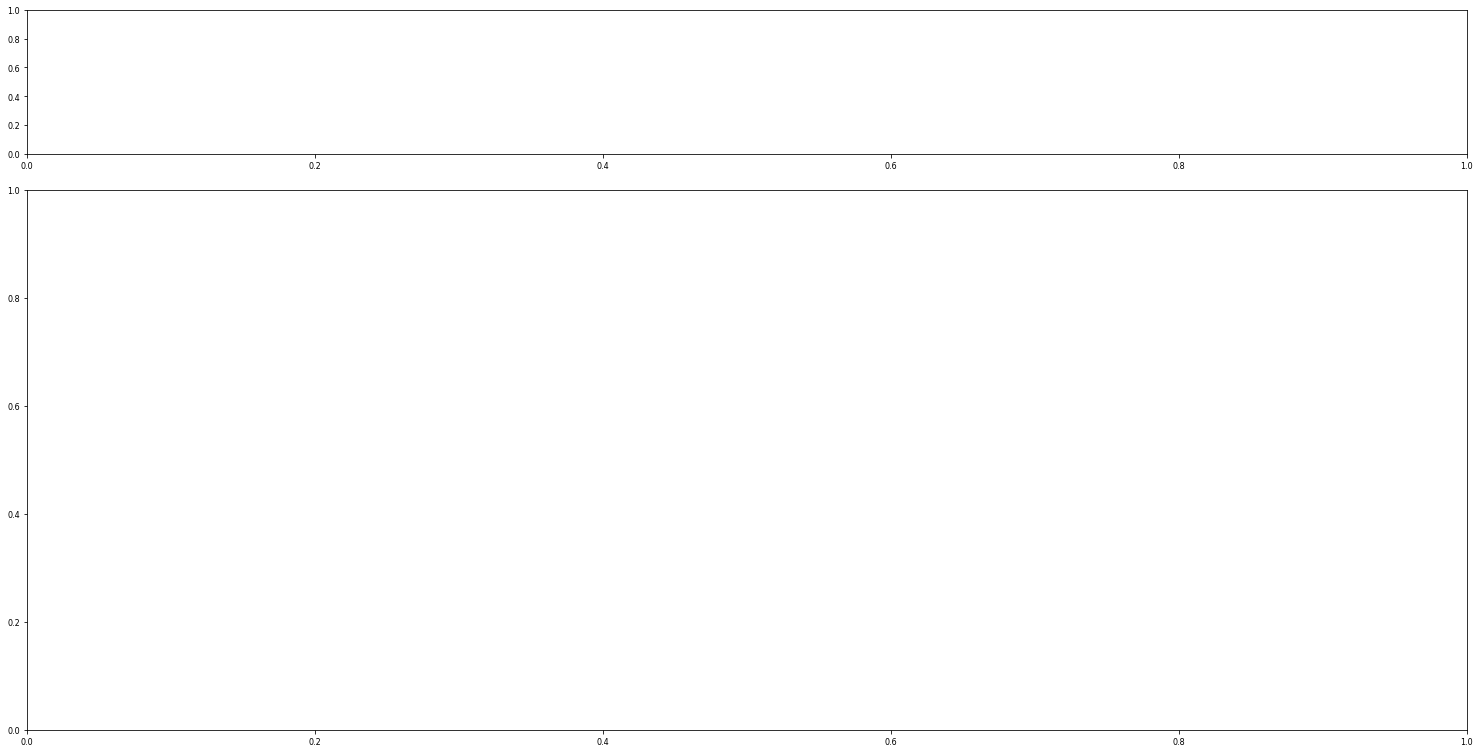

In [9]:
# get the spikes for each unit and plot accordingly
f = plt.figure(figsize=(20,10))
axes = f.add_axes([0.1, 0.8, 1, 0.2])
axes2 = f.add_axes([0.1, 0, 1, 0.75])

for k in all_Units_aligned.keys():
    print(len(np.concatenate(all_Units_aligned[k])))
    
    # figure
    axes.plot(np.arange(0,len(WhiteNoise))*1/Fs, WhiteNoise
              , color = 'black'
              , linewidth = 1
             )
    axes.set_xticklabels([])
    axes.set_ylabel('Motor stimulus (V)', fontsize = 20)

    
    axes2.eventplot(all_Units_aligned[k]
                  ,linelengths = 0.5
                 ,lineoffsets = 1
                 , linewidth = 1
                 , color = 'black'
                   )

    axes2.set_xlim([0, len(WhiteNoise)*1/Fs])
    axes.set_xlim([0, len(WhiteNoise)*1/Fs])

    axes2.set_ylabel('Repeats', fontsize = 20)
    axes2.set_yticklabels(labels = axes2.get_yticks(), fontsize = 15)
    axes2.set_xlabel('Time (seconds)', fontsize = 20)
    axes2.set_xticklabels(labels = axes2.get_xticks(), fontsize = 15)
    axes.set_yticklabels(labels = axes2.get_yticks(), fontsize = 15)
    filename = './dataFolder/' + name + '_' + k + '_raster.pdf'
    plt.savefig(filename, bbox_inches = 'tight')
    axes.cla()
    axes2.cla()

In [10]:
# save aligned spikes and whiteNoise repeat separately 

# whiteNoise_single = pd.DataFrame({'WhiteNoise': WhiteNoise})
# Unit1 = pd.DataFrame({'repeats_unit1': Spike_repeats_unit1})
# Unit2 = pd.DataFrame({'repeats_unit2': Spike_repeats_unit2})

In [11]:
len(np.concatenate(all_Units_aligned[k]))

15302